In [1]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
from scipy import stats

data = Table.read_table("https://github.com/data-8/history-connector/raw/gh-pages/Data4.csv")

def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)

# Regression

Last time, we looked at the relationships between grain-workers and relief payments, and between wage-earners and relief payments.

This time, we will continue our discussion about association by looking at:

/1/ The effect of an outlier on the r value

/2/ Deriving the regression line

/3/ Interpreting the slope and the intercept


## /1/ Outliers

Remember from last class that we discovered that one parish has exceptionally high unemployment, around 60%, and several are around 30% (Greece's unemployment rate is about 25% nowadays, a figure typical during the Great Depression as the table below of US unemployment shows):

Y	1929	1930	1931	1932	1933	1934	1935	1936	1937
%U	3.1	     8.7	15.8	23.5	24.8	21.6	20	    16.8	14.2
 

Y	1938	1939	1940	1941
%U	18.9	17.1	14.5	9.7

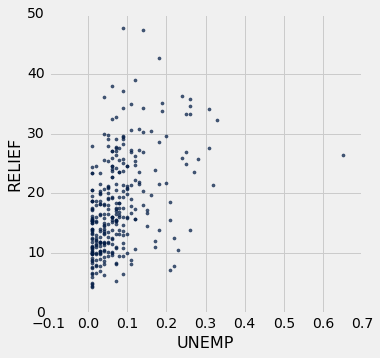

In [2]:
data.scatter ("UNEMP", "RELIEF", s=10)
#plots.scatter(data.column("UNEMP"), data.column("RELIEF"))

Last time, we also calculated the *r* with all 311 parishes. Let's compare that to the *r* *without* the outlier parish. There must be a very, very strong reason to do this in research, and we are doing it here as a learning exercise.

For instance, we might have a strong theoretical reason for dropping exceptionally high and exceptionally low values -- some unemployment is, what economists call, natural (people changing jobs), and unemployment beyond a certain level signifies a process that goes beyond usual labor market fluctuations (natural disaster).

URT3= data.select(["UNEMP", "RELIEF"]).where(np.logical_and(data.column("UNEMP") >0.03, data.column("UNEMP") <0.30))

URT3.scatter("UNEMP", "RELIEF", fit_line=True)
URT3.hist("UNEMP", bins=np.arange(0, 0.5, 0.01))


We will use the function standard_units that we defined last class to do this, once again:

In [7]:
data.where(data.colum("COUNTY")=1)

SyntaxError: keyword can't be an expression (<ipython-input-7-314c779054e4>, line 1)

In [3]:
#Step 0: Drop the outlier; for ease, Unemployment Relief Trimmed can just be shortened to URT
#Another acronym may be more intuitive to you.

#Question: How may rows do we expect?

URT = data.select(["UNEMP", "RELIEF"]).where(data.column("UNEMP")<0.40)
URT

UNEMP,RELIEF
0.14,20.36
0.07,29.09
0.05,14.93
0.06,24.12
0.03,18.21
0.1,20.73
0.07,8.12
0.01,14.02
0.08,18.42
0.26,34.55


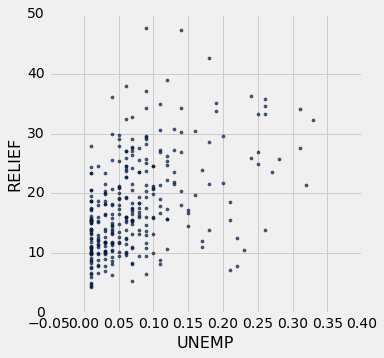

In [4]:
#Check visually, and do you easily notice a difference?

URT.scatter('UNEMP', 'RELIEF', s=10)

#Alternative: plots.scatter(URT.column('UNEMP'), URT.column('RELIEF'))

In [ ]:
#Step 1: Get the data you're concerned with in standard units

URT_su = URT.with_columns
    ......
    ]).select(['UNEMP', 'RELIEF', 'UNEMP (su)','RELIEF (su)'])
URT_su


In [ ]:
#Step 3: Find the product of your SU columns

URT_product = URT_su.column("UNEMP (su)") * URT_su.column("RELIEF (su)")
URT_product

In [ ]:
#Step 4: Find the mean, which is your r
r = np.mean(URT_product)
r

Recall that last time, the r we calculated (without trimming the outlier) was ~0.365 (or, more precisley, 0.36475785072022804).

What does this difference between the two correlation coefficients tell you? What do you think happens if we drop other values? 

Try “dropping” some values, and justify your choice (you can do this in the cells above, by modifying your code - no need to re-do it all).

## /2/ Regression Line

Last time, we included a ‘fit_line=True’ to convince ourselves that the r was, in fact, positive, and in section 3 we will actually derive the line.

In [ ]:
#Try several options with plots!

URT_su.scatter("UNEMP (su)", "RELIEF (su)", 0, fit_line=True, s=10)
_ = plots.plot([...], [....], color='r', lw=3)

In [ ]:
# Compare to rounded standard units of UNEMP and RELIEF

rounded = URT_su.with_columns(["UNEMP SU rounded", np.round(URT_su.column("UNEMP (su)")),
                              "RELIEF SU rounded", np.round(URT_su.column("RELIEF (su)"))]).select(["UNEMP SU rounded", "RELIEF (su)"])

rounded.scatter(0, fit_line=True, s=10)
_ = plots.plot([-1, 3], [-1 * r, 3 * r], color='g', lw=2)


What are the differences between these two plots, and how would the results change if you included the outlier, or dropped a different series of outliers? Dropping values go get a better fit requires a strong justification; you can see some of the manipulation of results, sometimes called 'p-hacking', that goes on in research:

(http://fivethirtyeight.com/features/science-isnt-broken/#part2; and
http://www.nature.com/news/scientific-method-statistical-errors-1.14700)

## /3/ Interpreting the values of the slope and intercept

In the social sciences, one way to describe relationships is in terms of so-called marginal effects – how much does Y change when X changes by 1? 

Since both UNEMP and RELIEF are quantitative variables, it makes sense to talk about how much does RELIEF change as, on average, proportion UNEMP increases by 1 percent or even 10 percent. To do this, we need to calculate the slope and the intercept:

In [ ]:
# Find the equation of the regression line. In standard units, r is the slope. What is the intercept in SU?

intercept_su = np.mean(URT_su.column("RELIEF (su)")) - r * np.mean(URT_su.column("UNEMP (su)"))
intercept_su

Just write the equation, in terms of variables we have defined, for the best-fit line in standard units:

y = r * x + intercept_su


In [ ]:
# Now, calculate these values for our original units:
slope = r * np.std(URT.column("...."))/np.std(URT.column("...."))
intercept = np.mean(URT.column("....")) - slope * np.mean(URT.column("...."))

#Display the slope and the intercept in a list
[slope, intercept]

## Questions and Exercises

/1/ What does the intercept signify and how is it different from the mean/average? Does the intercept necessarily have a meaningul interpretation? Think of the examples discussed in class, namely Galton's findings about the heights of father's and son's.

*double-click and enter your answer here*

/2/ Complete this statement: On average, a one-unit increase in the proportion of unemployed wage-laborers is associated with an increase in relief payments of ____ shillings.   

*(double-click to edit)*

/3/ Do the same as above, but for GRAIN and RELIEF. What intuition do you gain by thinking in terms of r, the slope and intercept?

*(Add as many cells as you need!)* 

/4/ How about WEALTH and POP? Does it look like a linear regression would be a good fit here?

*(Add as many cells as you need!)* 